Mundenhof Base Station (NW)
===

Date: 23.11.2022

Time: 11:24:23 - 11:31:33 GMT+1

Duration: 0:07:10

Movement: Static

GPS update period: 0.25 s

## Summary of the Analysis

- The LLA cordinate is believed to be 48.00972583°N, 7.78445500°E, 276.6 m

# Data Pre-processing

## Load CSV File

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

filename = "tableview_221210_001120_full.csv"  # update csv filename here

frequency = 4   # update data update rate

# Reference point information
ref_lla = [48.012317, 7.813296, 289.4]  # Geodetic: Lat, Lon, Alt (HAE)
ref_lla_err = [1.1, 0.8, 0.1 ]  # errors in m
ref_ecef = [4235206.8, 581152.46, 4718007.72]  # Earth Centered - Earth Fixed: x, y, z

df = pd.read_csv(filename)

# Convert UTC column to datetime
df["UTC"] = pd.to_datetime(df["UTC"])

## Additional Data

In [2]:
df["DGPS"] = df["DGPS"].eq("Yes").astype(int)
df["dT"] = df["UTC"].diff() / np.timedelta64(1, "s")
df["Alt (HAE) Rate of Change"] = df["Alt (HAE)"].diff() * df["dT"]
df["Alt Error"] = df["Alt (HAE)"] - ref_lla[2]
df["ECEF Error X"] = df["X"] - ref_ecef[0]
df["ECEF Error Y"] = df["Y"] - ref_ecef[1]
df["ECEF Error Z"] = df["Z"] - ref_ecef[2]
df["ECEF Error"] = np.sqrt(df["ECEF Error X"] ** 2 + df["ECEF Error Y"] ** 2 + df["ECEF Error Z"] ** 2)

## Unuseful a.t.m
df["X Diff"] = df["X"].diff()
df["Y Diff"] = df["Y"].diff()
df["Z Diff"] = df["Z"].diff()
df["Distance Change"] = np.sqrt(df["X Diff"] ** 2 + df["Y Diff"] ** 2 + df["Z Diff"] ** 2)
df["Velocity"] = df["Distance Change"] * df["dT"]

# Summary of data frame
df.info()
pd.set_option('display.max_columns', None)
df.tail(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Index                     1985 non-null   int64         
 1   UTC                       1985 non-null   datetime64[ns]
 2   GPS time                  1985 non-null   object        
 3   Fix type (GPS)            1985 non-null   object        
 4   DGPS                      1985 non-null   int64         
 5   Carrier Range Status      1985 non-null   int64         
 6   X                         1985 non-null   float64       
 7   Y                         1985 non-null   float64       
 8   Z                         1985 non-null   float64       
 9   Lat                       1985 non-null   float64       
 10  Lon                       1985 non-null   float64       
 11  Alt (HAE)                 1985 non-null   float64       
 12  Alt (MSL)           

Index                     UTC         GPS time Fix type (GPS)  DGPS  \
1982   1982 2022-11-23 11:00:40.250  2237:298858.250             3D     1   
1983   1983 2022-11-23 11:00:40.500  2237:298858.500             3D     1   
1984   1984 2022-11-23 11:00:40.750  2237:298858.750             3D     1   

      Carrier Range Status            X           Y            Z        Lat  \
1982                     1  4235702.436  579048.395  4717805.508  48.009726   
1983                     1  4235702.436  579048.395  4717805.508  48.009726   
1984                     1  4235702.436  579048.395  4717805.508  48.009726   

           Lon  Alt (HAE)  Alt (MSL)  VX  VY  VZ  VN  VE  VD   SoG  VACC 3D  \
1982  7.784456      276.6      229.3 NaN NaN NaN NaN NaN NaN  0.01      NaN   
1983  7.784456      276.6      229.3 NaN NaN NaN NaN NaN NaN  0.01      NaN   
1984  7.784456      276.6      229.3 NaN NaN NaN NaN NaN NaN  0.01      NaN   

      2d Err  HDOP  VDOP  PDOP  SVs Tracked  SVs Used  \
1982     NaN   0.6   1.0   1.1           44        30   
1983     NaN   0.6   1.0   1.1           44        30   
1984     NaN   0.6   1.0   1.1           44        30   

                                               Used SVs    dT  \
1982  G2 G5 G7 G9 G11 G13 G14 G20 G30 R3 R4 R5 R13 R...  0.25   
1983  G2 G5 G7 G9 G11 G13 G14 G20 G30 R3 R4 R5 R13 R...  0.25   
1984  G2 G5 G7 G9 G11 G13 G14 G20 G30 R3 R4 R5 R13 R...  0.25   

      Alt (HAE) Rate of Change  Alt Error  ECEF Error X  ECEF Error Y  \
1982                       0.0      -12.8       495.636     -2104.065   
1983                       0.0      -12.8       495.636     -2104.065   
1984                       0.0      -12.8       495.636     -2104.065   

      ECEF Error Z  ECEF Error  X Diff  Y Diff  Z Diff  Distance Change  \
1982      -202.212  2171.09057     0.0     0.0     0.0              0.0   
1983      -202.212  2171.09057     0.0     0.0     0.0              0.0   
1984      -202.212  2171.09057     0.0     0.0     0.0              0.0   

      Velocity  
1982       0.0  
1983       0.0  
1984       0.0

# Basic Statistics

In [3]:
print("Number of data points:", df["Index"].count())

idx_RTK_lockin = df.loc[(df["DGPS"] == 1) & (df["Carrier Range Status"] > 0)].index[0]

print(f"Index of first RTK lock-in: {idx_RTK_lockin}")

df.describe()

Number of data points: 1985
Index of first RTK lock-in: 37


Index         DGPS  Carrier Range Status             X  \
count  1985.000000  1985.000000           1985.000000  1.985000e+03   
mean    992.000000     0.982368              1.560705  4.235703e+06   
std     573.164462     0.131644              0.537380  4.600440e-01   
min       0.000000     0.000000              0.000000  4.235701e+06   
25%     496.000000     1.000000              1.000000  4.235702e+06   
50%     992.000000     1.000000              2.000000  4.235702e+06   
75%    1488.000000     1.000000              2.000000  4.235703e+06   
max    1984.000000     1.000000              2.000000  4.235705e+06   

                   Y             Z           Lat          Lon    Alt (HAE)  \
count    1985.000000  1.985000e+03  1.985000e+03  1985.000000  1985.000000   
mean   579048.411540  4.717806e+06  4.800973e+01     7.784456   276.787557   
std         0.169809  5.636799e-01  5.951986e-07     0.000002     0.727118   
min    579047.838000  4.717805e+06  4.800973e+01     7.784447   275.400000   
25%    579048.354000  4.717805e+06  4.800973e+01     7.784455   276.600000   
50%    579048.366000  4.717805e+06  4.800973e+01     7.784455   276.600000   
75%    579048.399000  4.717805e+06  4.800973e+01     7.784456   276.600000   
max    579049.054000  4.717809e+06  4.800973e+01     7.784465   281.100000   

         Alt (MSL)   VX   VY   VZ        VN       VE   VD          SoG  \
count  1985.000000  0.0  0.0  0.0  2.000000  2.00000  0.0  1985.000000   
mean    229.487557  NaN  NaN  NaN -0.170000 -0.07500  NaN     0.009229   
std       0.727118  NaN  NaN  NaN  0.014142  0.13435  NaN     0.009480   
min     228.100000  NaN  NaN  NaN -0.180000 -0.17000  NaN     0.000000   
25%     229.300000  NaN  NaN  NaN -0.175000 -0.12250  NaN     0.010000   
50%     229.300000  NaN  NaN  NaN -0.170000 -0.07500  NaN     0.010000   
75%     229.300000  NaN  NaN  NaN -0.165000 -0.02750  NaN     0.010000   
max     233.800000  NaN  NaN  NaN -0.160000  0.02000  NaN     0.250000   

       VACC 3D  2d Err         HDOP         VDOP         PDOP  SVs Tracked  \
count      0.0     0.0  1985.000000  1985.000000  1985.000000  1985.000000   
mean       NaN     NaN     0.598237     0.976574     1.129068    39.937028   
std        NaN     NaN     0.013164     0.046450     0.055869     3.160454   
min        NaN     NaN     0.500000     0.800000     0.900000    21.000000   
25%        NaN     NaN     0.600000     1.000000     1.100000    39.000000   
50%        NaN     NaN     0.600000     1.000000     1.100000    41.000000   
75%        NaN     NaN     0.600000     1.000000     1.200000    42.000000   
max        NaN     NaN     0.600000     1.100000     1.200000    44.000000   

          SVs Used       dT  Alt (HAE) Rate of Change    Alt Error  \
count  1985.000000  1984.00               1984.000000  1985.000000   
mean     29.342065     0.25                  0.000151   -12.612443   
std       0.552093     0.00                  0.009493     0.727118   
min      28.000000     0.25                 -0.025000   -14.000000   
25%      29.000000     0.25                  0.000000   -12.800000   
50%      29.000000     0.25                  0.000000   -12.800000   
75%      30.000000     0.25                  0.000000   -12.800000   
max      30.000000     0.25                  0.250000    -8.300000   

       ECEF Error X  ECEF Error Y  ECEF Error Z   ECEF Error       X Diff  \
count   1985.000000   1985.000000   1985.000000  1985.000000  1984.000000   
mean     495.794832  -2104.048460   -202.104018  2171.100874     0.000492   
std        0.460044      0.169809      0.563680     0.160929     0.026817   
min      494.655000  -2104.622000   -203.017000  2170.421487    -0.083000   
25%      495.695000  -2104.106000   -202.274000  2171.090570     0.000000   
50%      495.697000  -2104.094000   -202.262000  2171.139178     0.000000   
75%      495.710000  -2104.061000   -202.225000  2171.148887     0.000000   
max      498.547000  -2103.406000   -198.769000  2171

# Navigation Status

In [4]:
# Helper Functions
# TODO: Make it a module for import

def highlight_carrier_status(ax, df):
    idxes = df[df["Carrier Range Status"].diff() != 0 ].index.tolist()
    idxes.append(df.index.max()+1)
    
    for start, end in zip(idxes, idxes[1:]):
        status = df["Carrier Range Status"][start]
        if status == 1:
            ax.axvspan(df["UTC"][start], df["UTC"][end-1], alpha=0.2, color="blue")
        elif status == 2:
            ax.axvspan(df["UTC"][start], df["UTC"][end-1], alpha=0.2, color="green")
        else:
            ax.axvspan(df["UTC"][start], df["UTC"][end-1], alpha=0.2, color="red")


Red region: No solution for carrier-phase measurement (carrier-range status = 0)
Blue region: Float mode for carrier range. Not all carrier-phase ambiguities are resolved. (carrier-range status = 1)
Green resion: Fix mode for carrier range. All carrier-phase ambiguities are resolved. (carrier-range status = 2)


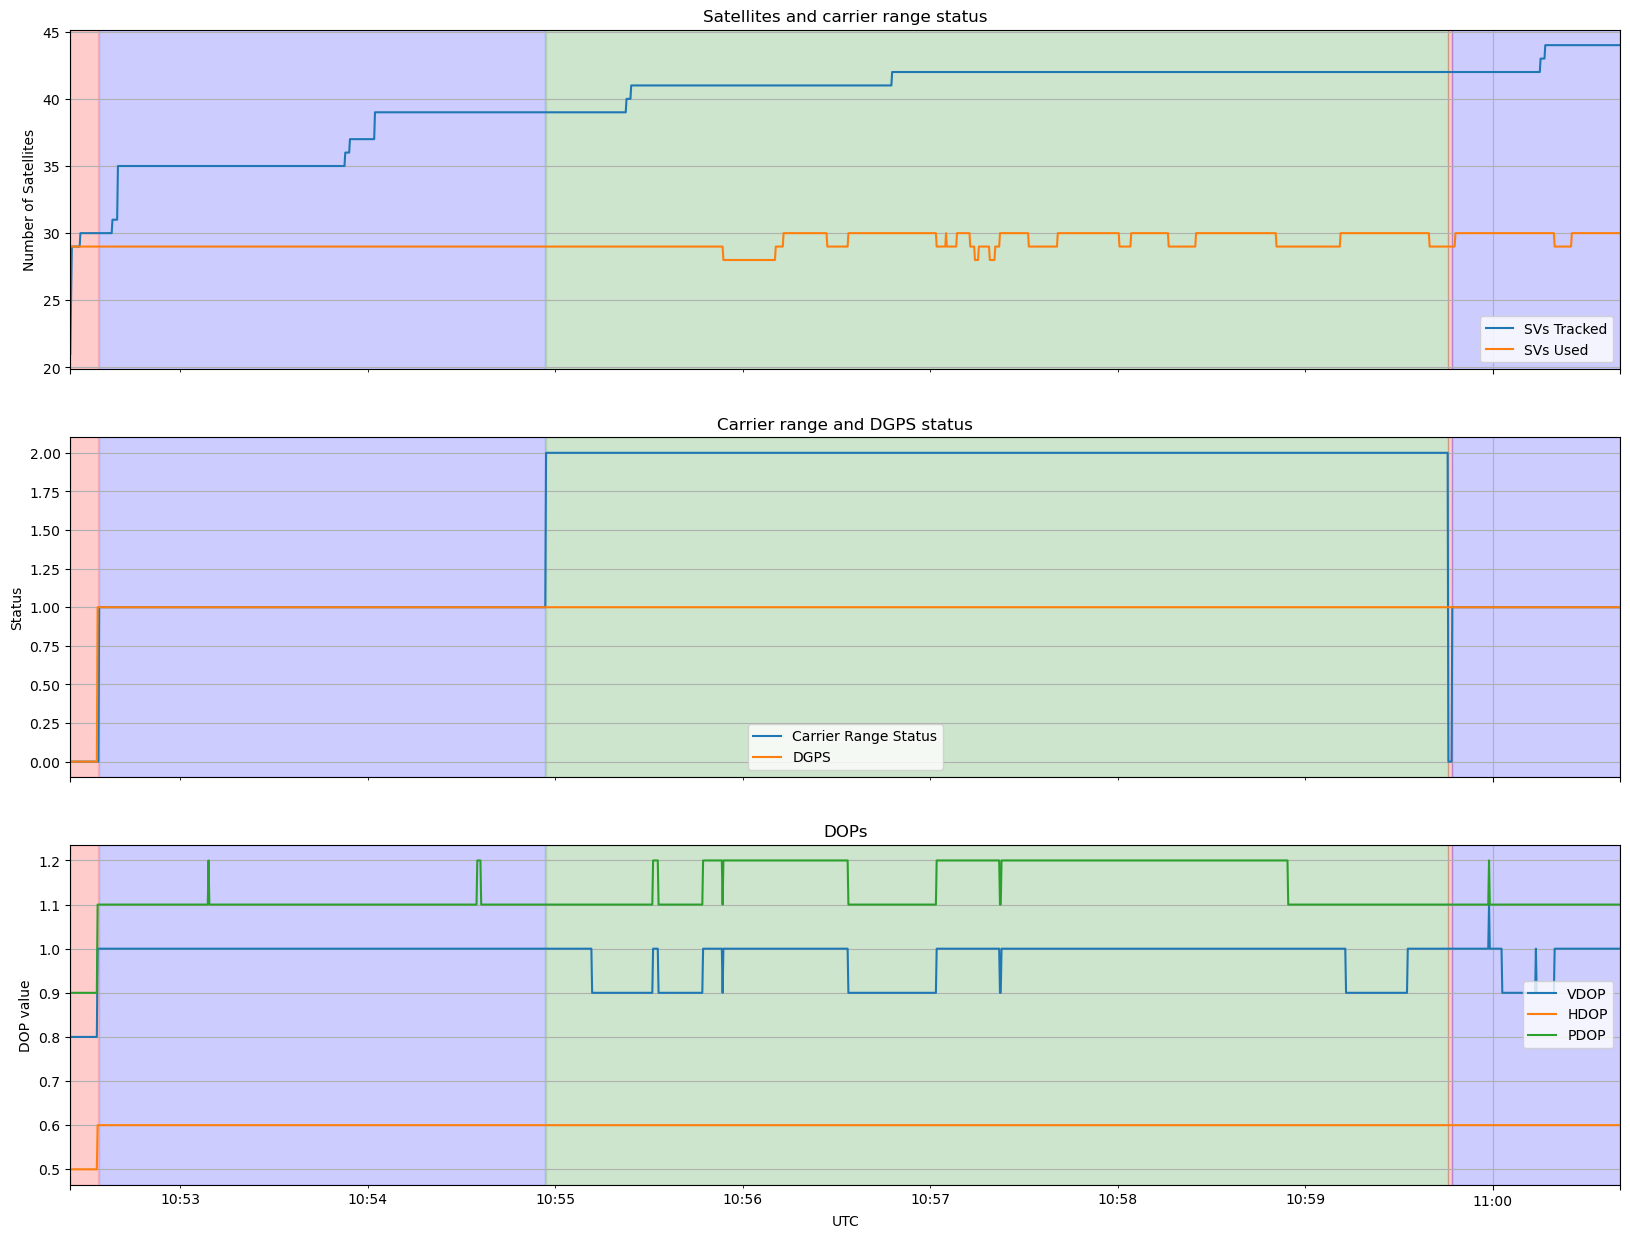

Total no. of data points = 1985
Data points without carrier range availability = 42 (2.12%)
Data points with "float" carrier range status = 788 (39.70%)
Data points with "fix" carrier range status = 1155 (58.19%)


In [5]:
print("Red region: No solution for carrier-phase measurement (carrier-range status = 0)")
print("Blue region: Float mode for carrier range. Not all carrier-phase ambiguities are resolved. (carrier-range status = 1)")
print("Green resion: Fix mode for carrier range. All carrier-phase ambiguities are resolved. (carrier-range status = 2)")

fig, ax = plt.subplots(3, 1, figsize=(20, 15), sharex=True)

df.plot(ax=ax[0],
        title="Satellites and carrier range status",
        x="UTC",
        y=["SVs Tracked", "SVs Used"],
        ylabel="Number of Satellites",
        grid=True)

df.plot(ax=ax[1],
        title="Carrier range and DGPS status",
        x="UTC",
        y=["Carrier Range Status", "DGPS"],
        ylabel="Status",
        grid=True)

df.plot(ax=ax[2],
        title="DOPs",
        x="UTC",
        y=["VDOP", "HDOP", "PDOP"],
        ylabel="DOP value",
        grid=True)

for i in range(3):
    highlight_carrier_status(ax[i], df)

plt.show()

df_cs = df["Carrier Range Status"]
df_cs_total_cnt = df_cs.count()
df_cs_nofix_cnt = df_cs[df_cs == 0].count()
df_cs_float_cnt = df_cs[df_cs == 1].count()
df_cs_fix_cnt = df_cs[df_cs == 2].count()

print(f"Total no. of data points = {df_cs_total_cnt}")
print(f"Data points without carrier range availability = {df_cs_nofix_cnt} ({df_cs_nofix_cnt / df_cs_total_cnt * 100:0.2f}%)")
print(f"Data points with \"float\" carrier range status = {df_cs_float_cnt} ({df_cs_float_cnt / df_cs_total_cnt * 100:0.2f}%)")
print(f"Data points with \"fix\" carrier range status = {df_cs_fix_cnt} ({df_cs_fix_cnt / df_cs_total_cnt * 100:0.2f}%)")

## Observations

- High number of satellites in track/ used
- Carrier range ambiguities were never been fixed. Measurement time maybe too short.

# Altitude (HAE)

In [6]:
###
# Plot altitude vs time
###

print(f"Altitude of reference point: {ref_lla[2]} m +- {ref_lla_err[2]} m")

fig1, ax = plt.subplots(1, 1, figsize=(18, 5), sharex=True)
ax.set_title("Altitude (HAE)")
df.plot(ax=ax, x="UTC", y="Alt (HAE)", grid=True)
ax.set_ylabel("Altidude (HAE) in m")
highlight_carrier_status(ax, df)  # highight region according to carrier-phase status

## Carrier phase status
#ax[1].set_ylabel("Status")
#df.plot(ax=ax[1], x="UTC", y=["Carrier Range Status", "DGPS"], grid=True)

## VDOP
#ax[2].set_ylabel("VDOP")
#df.plot(ax=ax[2], x="UTC", y="VDOP", style='g-', grid=True)
#ax[0].set_xlabel("Time (UTC)")

#for i in range(3):
#    ax[i].axvspan(df["UTC"][0], df["UTC"][idx_RTK_lockin], alpha=0.2, color="red")

plt.show()

Altitude of reference point: 289.4 m +- 0.1 m


## Carrier Range = Fixed Only

In [7]:
###
# Helper functions for error evaluatinn
###

def ecdf(a: np.array):
    """
    Returns a tuple (value, #occurence) of the fiven data vector a
    """
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

def plot_hist_acdf_stat(ds, bins, quantile, hist_title, acdf_title, xlabel, unit):
    
    # Plot histogram
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    ds.hist(ax=ax[0], bins=bins)
    ax[0].set_title(hist_title)
    ax[0].set_ylabel("Frequency")
    ax[0].set_xlabel(f"{xlabel} ({unit})")
    , 
    # Plot CDF
    x, cusum = ecdf(ds)
    
    ax[1].plot(x, cusum)
    #ds_abs.hist(ax=ax[1], cumulative=True, density=False, bins=bins, histtype="stepfilled")
    ax[1].set_title(acdf_title)
    ax[1].set_ylabel("Likelihood of occurrence")
    ax[1].set_xlabel(f"{xlabel} ({unit})")
    ax[1].set_ylim((0.0, 1.1))
    plt.show()
    
    # List out statistics
    print("===Statistics (After RTK In-force)===")
    print("mean:", ds.mean(), unit)
    print("median:", ds.median(), unit)
    #print("mode:", ds.mode(), unit)
    print("max:", ds.max(), unit)
    print("min:", ds.min(), unit)
    
    for q in quantile:
        print(f"{(int)(q*100):d}th-percentile: {ds.quantile(q=q)} {unit}")

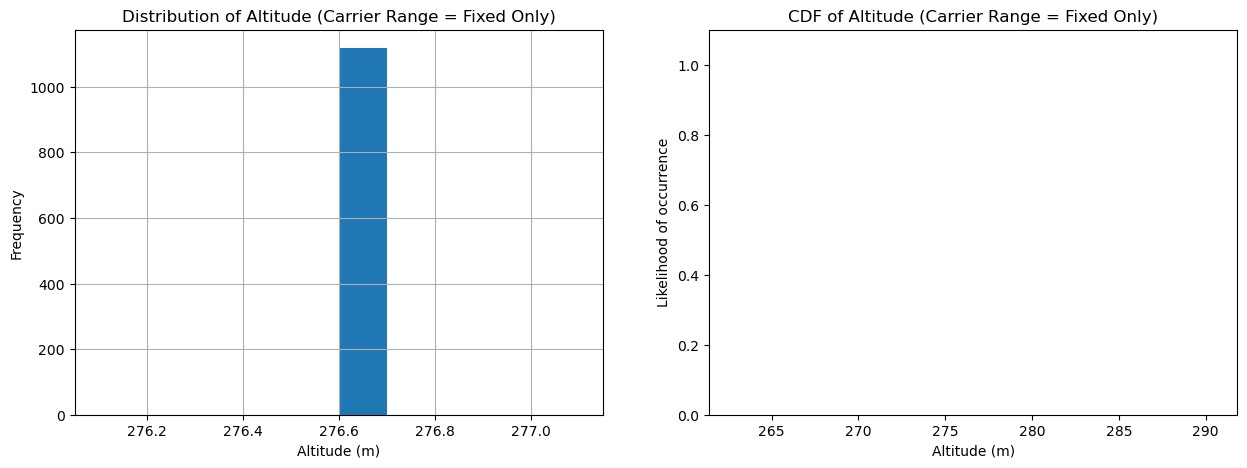

===Statistics (After RTK In-force)===
mean: 276.59999999999997 m
median: 276.6 m
max: 276.6 m
min: 276.6 m
95th-percentile: 276.6 m
88th-percentile: 276.6 m
50th-percentile: 276.6 m
25th-percentile: 276.6 m


In [8]:
df_carrier_2 = df.loc[df["Carrier Range Status"] == 2][idx_RTK_lockin:]
alt = df_carrier_2["Alt (HAE)"]
#alt_bins = (int)(math.ceil((alt.max() - alt.min())*10))
plot_hist_acdf_stat(alt,
                      bins = 10,
                      quantile = [0.95, 0.88, 0.5, 0.25],
                      hist_title = "Distribution of Altitude (Carrier Range = Fixed Only)",
                      acdf_title = "CDF of Altitude (Carrier Range = Fixed Only)",
                      xlabel = "Altitude",
                      unit = "m")

## Observations

- It is clear the the altitude is 276.6 m

# Position

In [9]:
# Helper function
# TODO: move to python module
def dist_lat_lon_to_meter(lat2, lat1, lon2, lon1):
    # Use Haversine formula to find distance (in m) between 2 point in lat/lon coordinate
    r = 6371  # approximate radius of earth
    
    dlat = math.radians(lat2) - math.radians(lat1)
    dlon = math.radians(lon2) - math.radians(lon1)

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    return r * c * 1000

## Position Map

In [10]:
# Select data
loc = df.loc[:, ["Index", "UTC", "Alt (HAE)", "X", "Y", "Z", "Lat", "Lon", "HDOP"]]
loc_rtk = df.loc[:, ["Index", "UTC", "X", "Y", "Z", "Lat", "Lon"]][idx_RTK_lockin:]

# Basic statistics
lat = loc_rtk["Lat"]
lat_max = lat.max()
lat_max_idx = lat.idxmax()
lat_max_utc = loc_rtk["UTC"][lat_max_idx]
lat_min = lat.min()
lat_min_idx = lat.idxmin()
lat_mean = lat.mean()
lat_median = lat.median()
lat_std = lat.std()
lat_var = lat.var()
lat_95til = lat.quantile(q=0.95)

long = loc_rtk["Lon"]
long_max = long.max()
long_max_idx = long.idxmax()
long_max_utc = df["UTC"][long_max_idx]
long_min = long.min()
long_min_idx = long.idxmin()
long_mean = long.mean()
long_median = long.median()
long_std = long.std()
long_var = long.var()
long_95til = long.quantile(q=0.95)

In [11]:
###
# Plot position map
###


div = 0.00002

fig = loc.plot.scatter(title="Position (Lat/Lon)",
                       x="Lon",
                       y="Lat",
                       c="Index",
                       xlim=(long_mean - div, long_mean + div),
                       ylim=(lat_mean - div, lat_mean + div),
                       colormap="viridis",
                       colorbar=True,
                       s=2,
                       grid=True,
                       figsize=(10, 10))
plt.plot(long_median, lat_median, marker="x", markersize=10, markeredgecolor="black")  # mark median position
fig.annotate("Med pos", xy=(long_median, lat_median))  # TODO: add arrow
plt.plot(ref_lla[1], ref_lla[0], marker="x", markersize=10, markeredgecolor="red")  # mark reference point
fig.annotate("Ref. pt", xy=(ref_lla[1], ref_lla[0]))  # TODO: add arrow
plt.show()

print(f"Medium lat/lon: {lat_median}, {long_median}")

Medium lat/lon: 48.00972583, 7.78445517


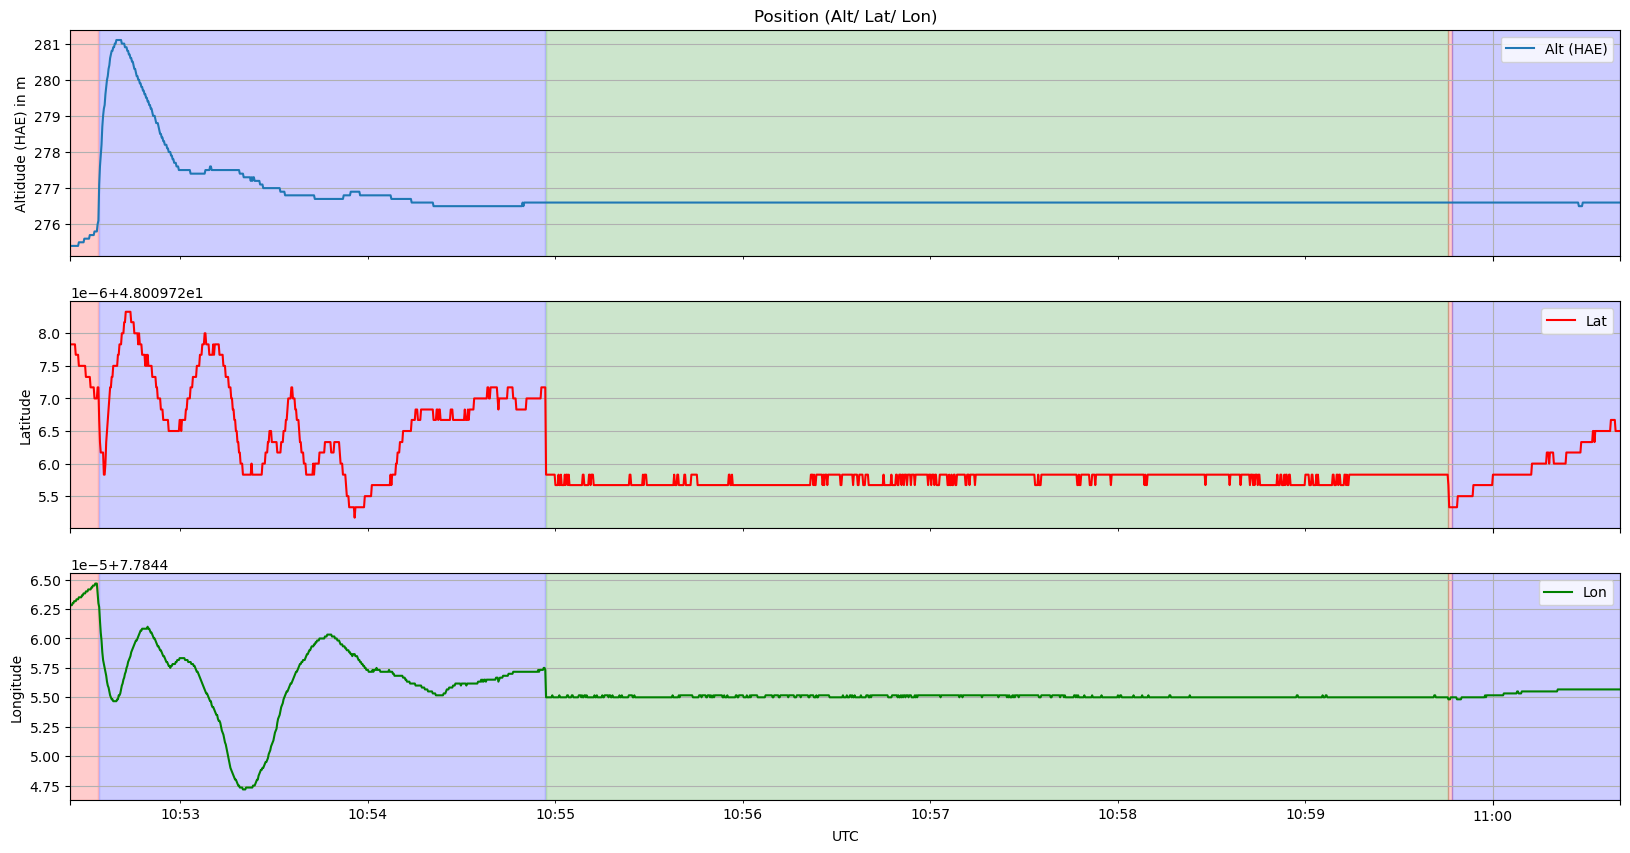

In [12]:
### 
# Plot latitude, longitude, altitude vs time
###

fig, ax = plt.subplots(3, 1, sharex=True, figsize=(20, 10))
ax[0].set_title("Position (Alt/ Lat/ Lon)")
loc.plot(ax=ax[0], x="UTC", y="Alt (HAE)", xlabel="Time (UTC)", ylabel="Altidude (HAE) in m", grid=True)
loc.plot(ax=ax[1], x="UTC", y="Lat", ylabel="Latitude", style='r-', grid=True)
loc.plot(ax=ax[2], x="UTC", y="Lon", ylabel="Longitude", style='g-', grid=True)

## VDOP
#df.plot(ax=ax[3], x="UTC", y="HDOP", style='y-', grid=True)
#ax[3].set_xlabel("Time (UTC)")
#ax[3].set_ylabel("HDOP")

for i in range(3):
    #ax[i].axvspan(df["UTC"][0], df["UTC"][idx_DGPS_lockin], alpha=0.2, color="red")
    highlight_carrier_status(ax[i], df)
plt.show()

## Carrier Range = Fixed Only

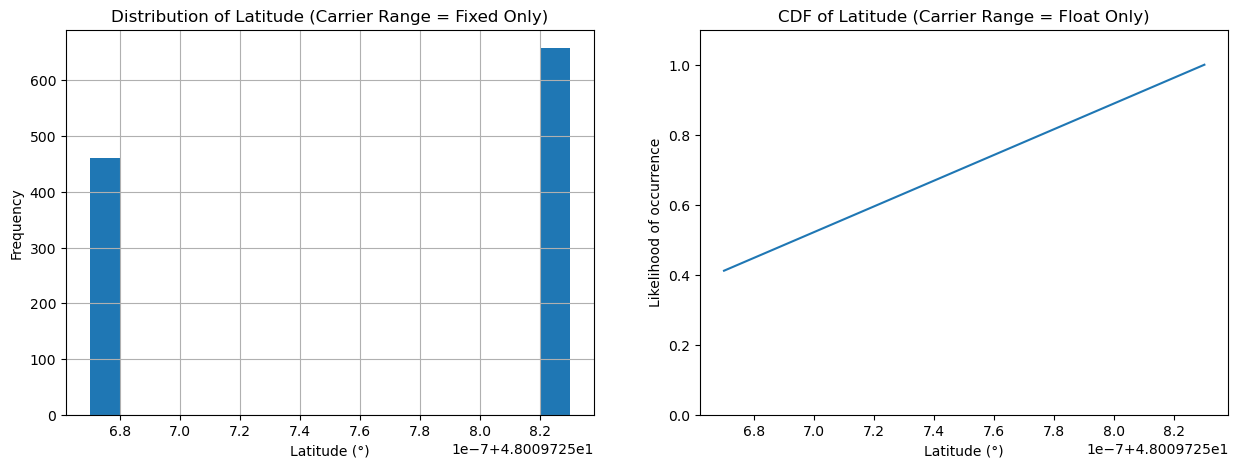

===Statistics (After RTK In-force)===
mean: 48.00972576416816 °
median: 48.00972583 °
max: 48.00972583 °
min: 48.00972567 °
95th-percentile: 48.00972583 °
88th-percentile: 48.00972583 °
50th-percentile: 48.00972583 °
25th-percentile: 48.00972567 °


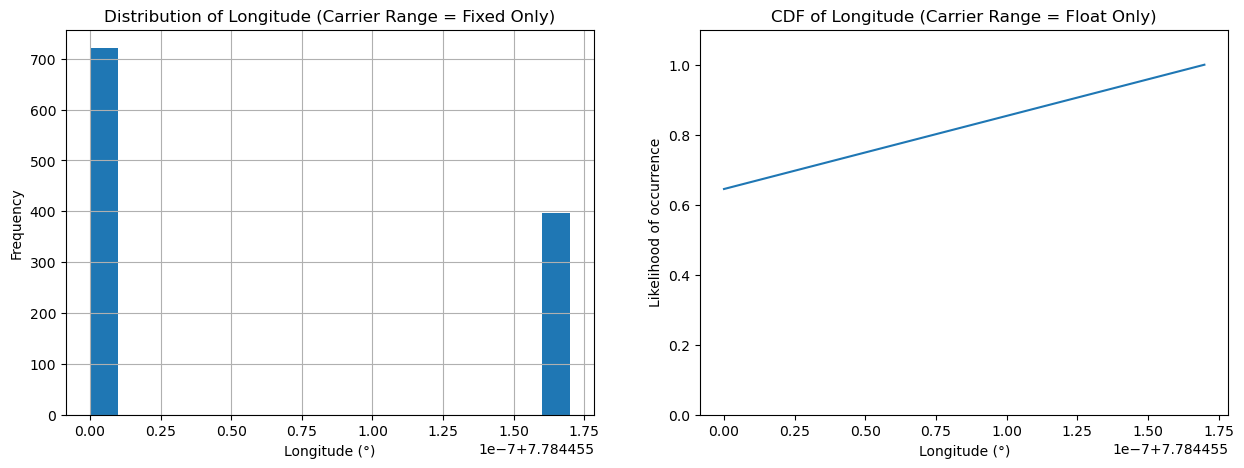

===Statistics (After RTK In-force)===
mean: 7.784455060366726 °
median: 7.784455 °
max: 7.78445517 °
min: 7.784455 °
95th-percentile: 7.78445517 °
88th-percentile: 7.78445517 °
50th-percentile: 7.784455 °
25th-percentile: 7.784455 °


In [13]:
df_carrier_2 = df.loc[df["Carrier Range Status"] == 2][idx_RTK_lockin:]
lat = df_carrier_2["Lat"]
lat_bins = (int)(math.ceil((lat.max() - lat.min())/0.00000001))
plot_hist_acdf_stat(lat,
                  bins = lat_bins,
                  quantile = [0.95, 0.88, 0.5, 0.25],
                  hist_title = "Distribution of Latitude (Carrier Range = Fixed Only)",
                  acdf_title = "CDF of Latitude (Carrier Range = Float Only)",
                  xlabel = "Latitude",
                  unit = "°")

lon = df_carrier_2["Lon"]
lon_bins = (int)(math.ceil((lon.max() - lon.min())/0.00000001))
plot_hist_acdf_stat(df_carrier_2["Lon"],
                          bins = lon_bins,
                          quantile = [0.95, 0.88, 0.5, 0.25],
                          hist_title = "Distribution of Longitude (Carrier Range = Fixed Only)",
                          acdf_title = "CDF of Longitude (Carrier Range = Float Only)",
                          xlabel = "Longitude",
                          unit = "°")

## Observations

- The median lat/lon is 48.00972583°N, 7.78445500°E

# Ground Speed

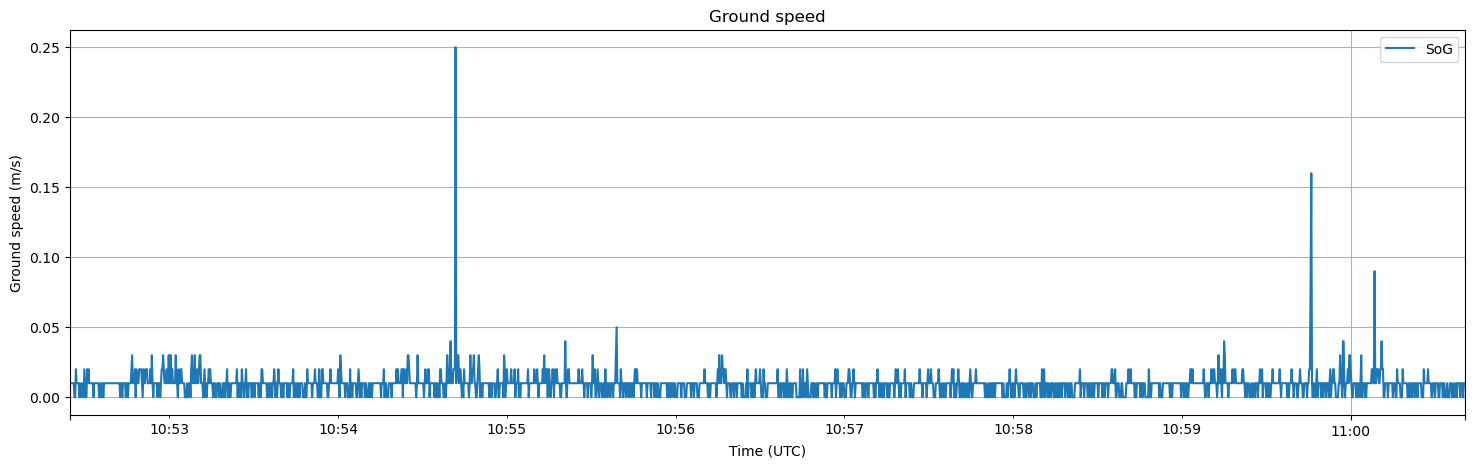

In [14]:
###
# Plot ground speed
###

sog = df.loc[:, ["UTC", "SoG"]]

sog.plot(title="Ground speed", x="UTC", y="SoG", xlabel="Time (UTC)", ylabel="Ground speed (m/s)", figsize=(18, 5), grid=True)
plt.show()

## Observations

- Due to deviation in position measurements, ground speed outputs were not 0 for most of the time